In [33]:
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [ ]:
#TODO - a priori acceptable difference mean and limits

In [35]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

In [36]:
result = pd.read_excel("results_xmap_and_vector.xlsx")
result.head()

,ID,Holes,Outcome,Age,Sex,"Try_1, pg/ml","Try_2, pg/ml","Mean, pg/ml","xMAP, pg/ml"
0,7,"G2,H2",смерть,59,1,30.68,31.13,30.91,60.042296
1,55,"G7,H7",тяжелый,62,1,26.29,24.84,25.57,20.481909
2,70,"H1,B3",смерть,50,1,51.69,54.35,53.02,48.805099
3,110,"E2,F2",смерть,57,1,17.86,21.03,19.45,7.412301
4,129,"C3,D3",смерть,62,1,133.30,155.10,144.20,144.136971


нельзя использовать корреляционный анализ

In [7]:
elisa_spearman, elisa_p = sp.stats.spearmanr(a = result["Mean, pg/ml"], b = result["xMAP, pg/ml"])
print('Correlation = ' + str(elisa_spearman))
print("P-value(r != 0) = " + str(elisa_p))

Correlation = 0.8731141708939982
P-value(r != 0) = 5.2742732243114875e-15


In [8]:
res = sp.stats.linregress(x = result["Mean, pg/ml"],y = result["xMAP, pg/ml"])
print("Slope = " + str(res.slope))
print("Intercept = " + str(res.intercept))
print("R2 = " + str(res.rvalue**2))
print("P-value = " + str(res.pvalue))
print("se_slope = " + str(res.stderr))
print("se_intersept = " + str(res.intercept_stderr))

Slope = 1.0238339450441183
Intercept = -7.411742961838883
R2 = 0.8558092554772119
P-value = 1.0765508004465995e-19
se_slope = 0.06408782004625203
se_intersept = 3.55180745729889


Text(50, 200, 'Searman r = 0.87\nR2 = 0.86\nAll significant')

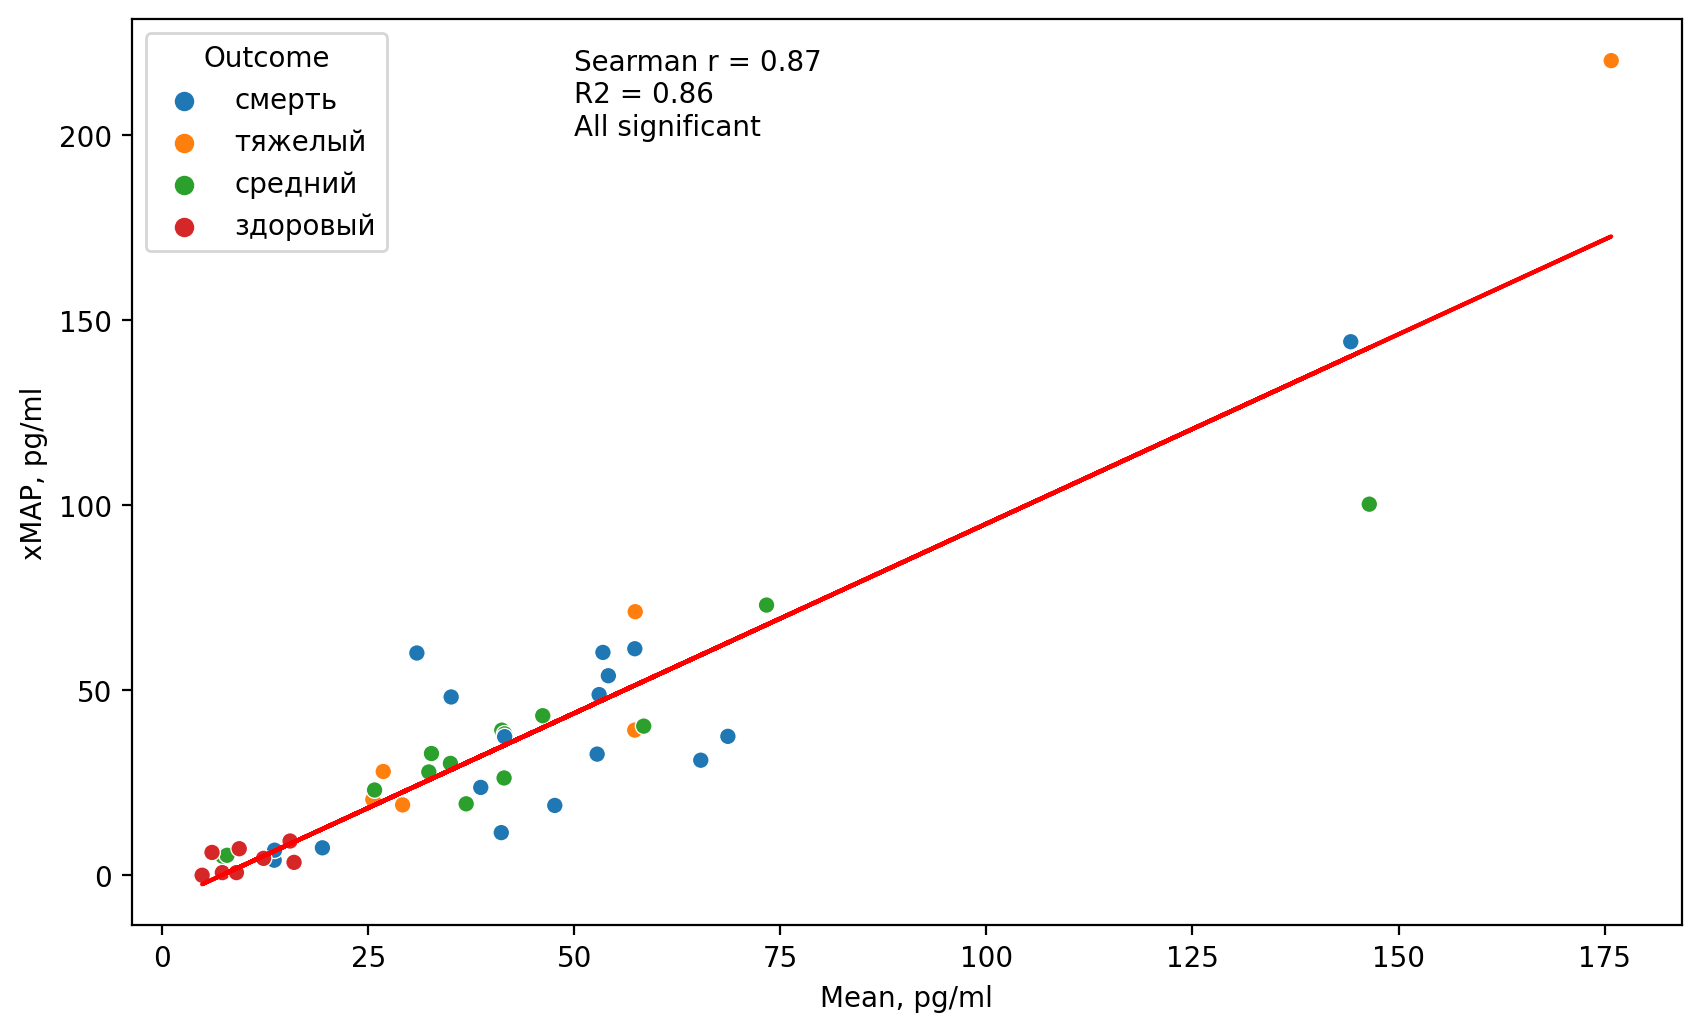

In [9]:
x = result["Mean, pg/ml"]
y = res.intercept + res.slope*result["Mean, pg/ml"]
text = "Searman r = " + str(round(elisa_spearman,2)) + "\n" + "R2 = " + str(round(res.rvalue**2,2)) + '\n' + 'All significant'
sns.scatterplot(data = result, x = "Mean, pg/ml", y = "xMAP, pg/ml", hue = "Outcome")
plt.plot(x, y, 'r', label='fitted line')
plt.text(50,200,text)

Bland-Altman

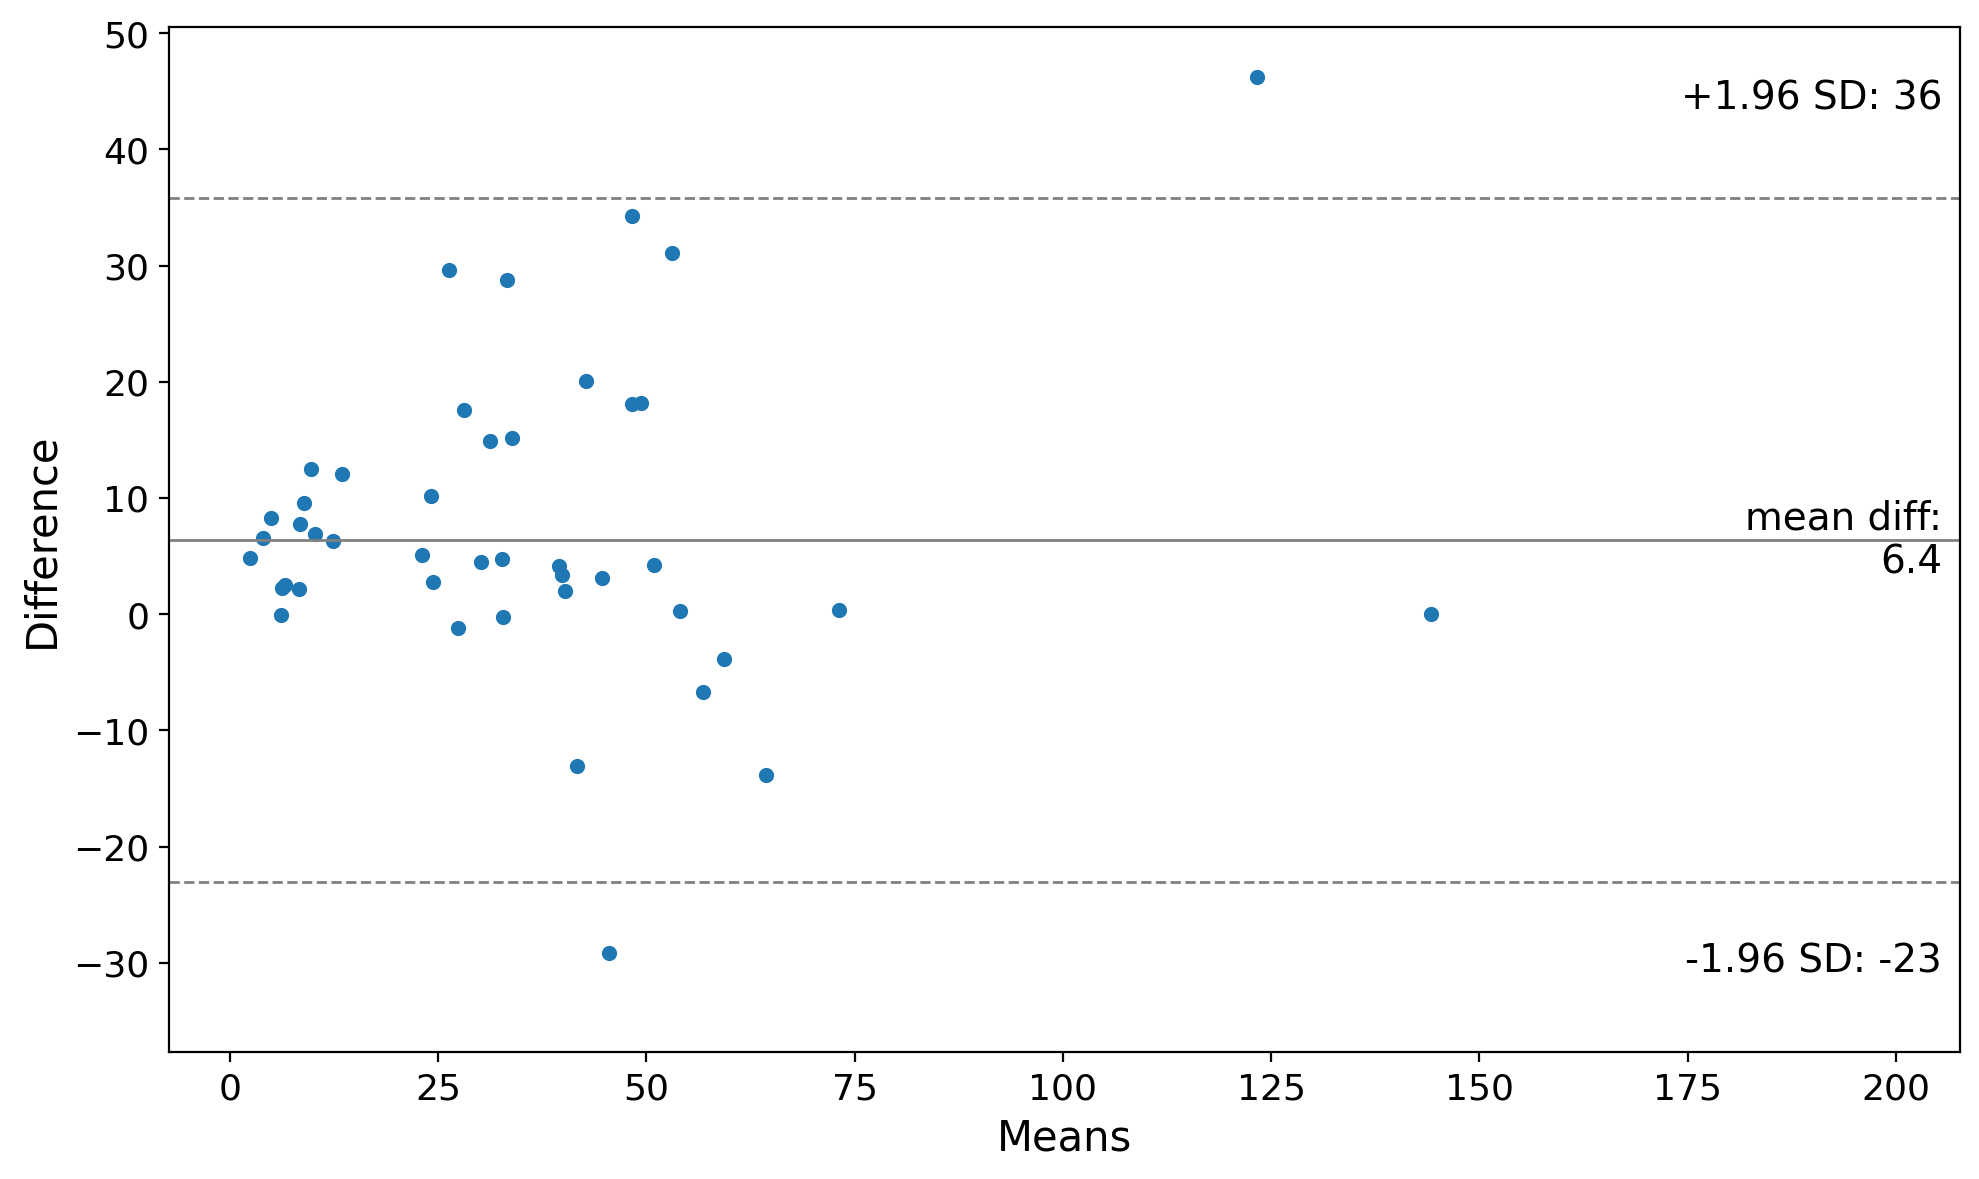

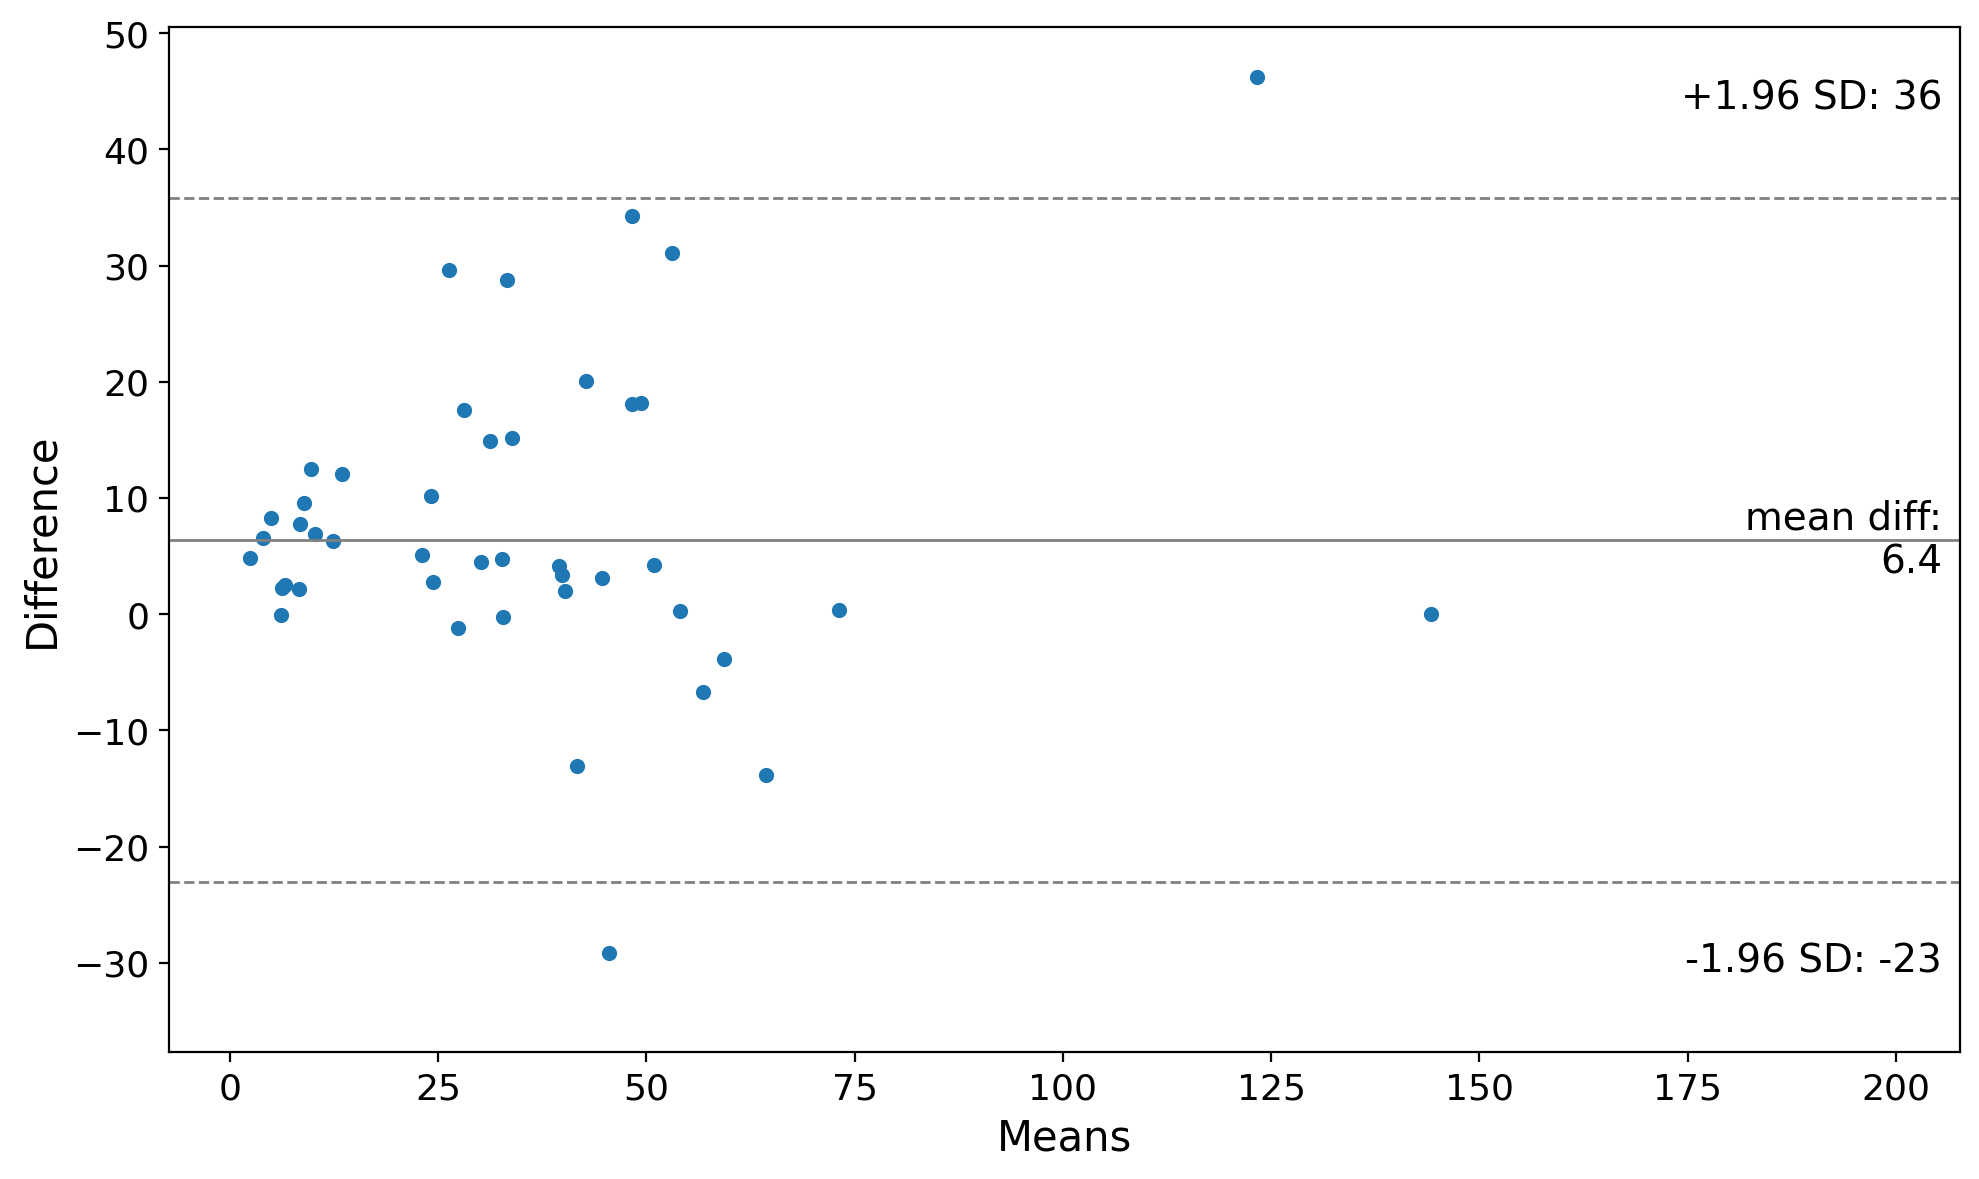

In [10]:
def color(outcome):
    if outcome == "смерть":
        return "black"
    elif outcome == "тяжелый":
        return "red"
    elif outcome == "средний":
        return "yellow"
    elif outcome == "здоровый":
        return "green"
    else:
        return "cyan"

palette = [color(i) for i in result["Outcome"]]
sm.graphics.mean_diff_plot(result["Mean, pg/ml"],result["xMAP, pg/ml"])

(array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  2.,
         5., 12.,  5.,  3.,  2.,  2.,  3.,  1.,  0.,  1.,  2.,  1.,  0.]),
 array([-40, -37, -34, -31, -28, -25, -22, -19, -16, -13, -10,  -7,  -4,
         -1,   2,   5,   8,  11,  14,  17,  20,  23,  26,  29,  32,  35,
         38]),
 <BarContainer object of 26 artists>)

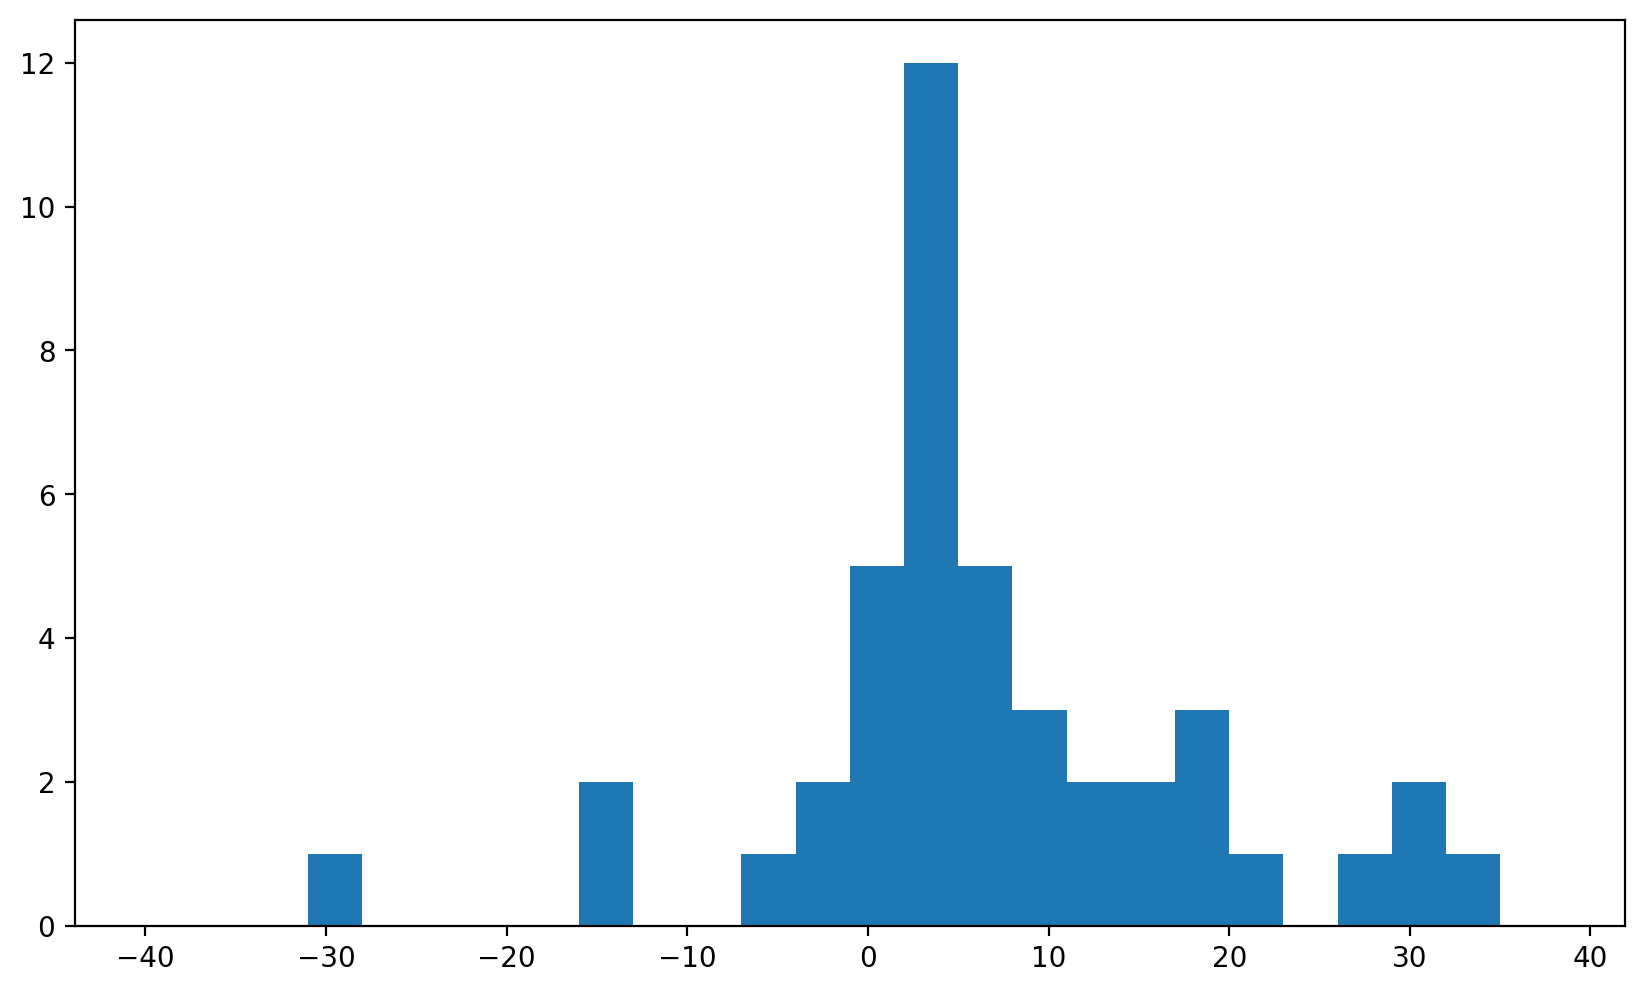

In [11]:
result["Diff"] = result["Mean, pg/ml"] - result["xMAP, pg/ml"]
plt.hist(result["Diff"], bins=range(-40,40,3))


In [12]:
sp.stats.shapiro(result["Diff"])

ShapiroResult(statistic=0.9151248931884766, pvalue=0.0029017869383096695)

((array([-2.16261902, -1.78552545, -1.56210618, -1.397212  , -1.26342445,
         -1.1490787 , -1.04806126, -0.95674251, -0.87277802, -0.79455752,
         -0.72092154, -0.65100286, -0.58413203, -0.51977796, -0.45750906,
         -0.39696667, -0.33784646, -0.27988499, -0.22284956, -0.16653055,
         -0.11073524, -0.05528282,  0.        ,  0.05528282,  0.11073524,
          0.16653055,  0.22284956,  0.27988499,  0.33784646,  0.39696667,
          0.45750906,  0.51977796,  0.58413203,  0.65100286,  0.72092154,
          0.79455752,  0.87277802,  0.95674251,  1.04806126,  1.1490787 ,
          1.26342445,  1.397212  ,  1.56210618,  1.78552545,  2.16261902]),
  array([-44.2808    , -29.13229574, -13.8038491 , -13.09559303,
          -6.721808  ,  -3.84382361,  -1.19848503,  -0.20797493,
          -0.1030144 ,   0.06302913,   0.23861845,   0.33807919,
           2.01117685,   2.1925812 ,   2.21902093,   2.487163  ,
           2.7506151 ,   3.0761598 ,   3.3581629 ,   4.1268331 ,
       

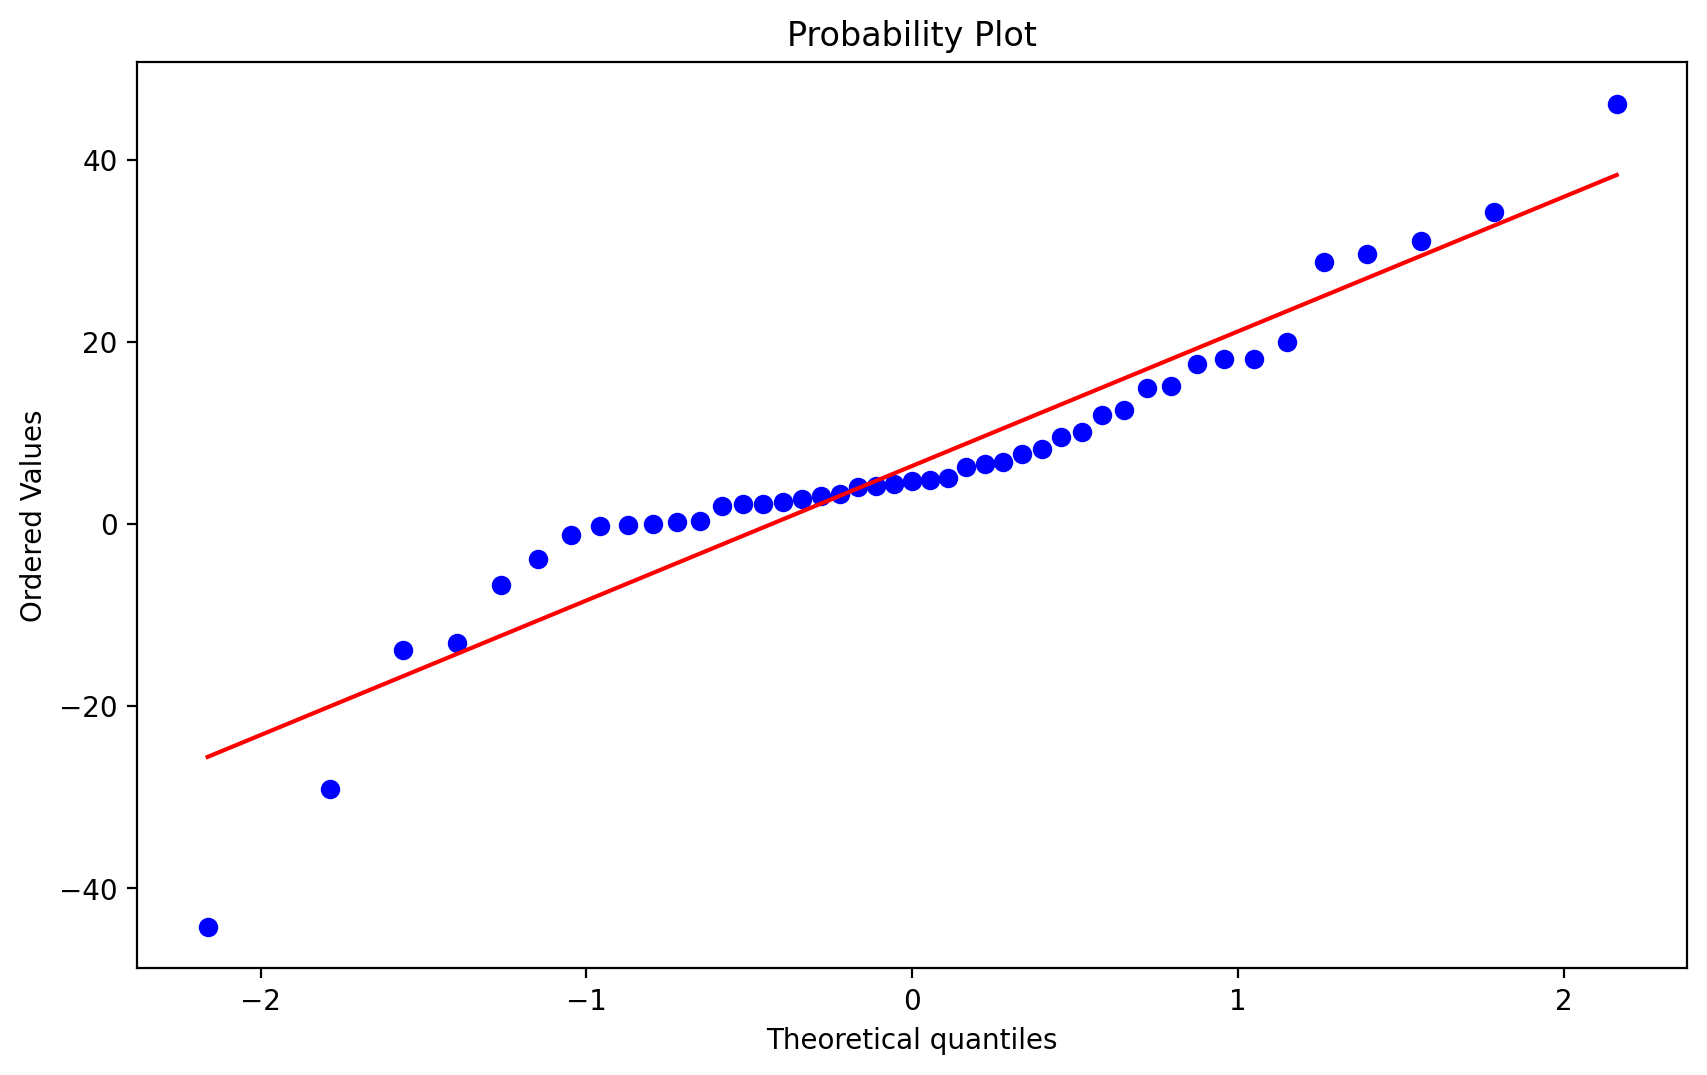

In [13]:
sp.stats.probplot(result["Diff"],plot = plt)

In [22]:
result["sqrt_Vector"] = np.sqrt(result["Mean, pg/ml"])
result["sqrt_xMAP"] = np.sqrt(result["xMAP, pg/ml"])
result["delta_sqrt"] = result["sqrt_Vector"] - result["sqrt_xMAP"]
sp.stats.shapiro(result["delta_sqrt"])
t = sp.stats.t(df = len(result.index) - 1).ppf(0.975)
se_mean = np.std(result["delta_sqrt"]) / np.sqrt(len(result.index))
se_limit = np.std(result["delta_sqrt"]) * np.sqrt(3) / np.sqrt(len(result.index))

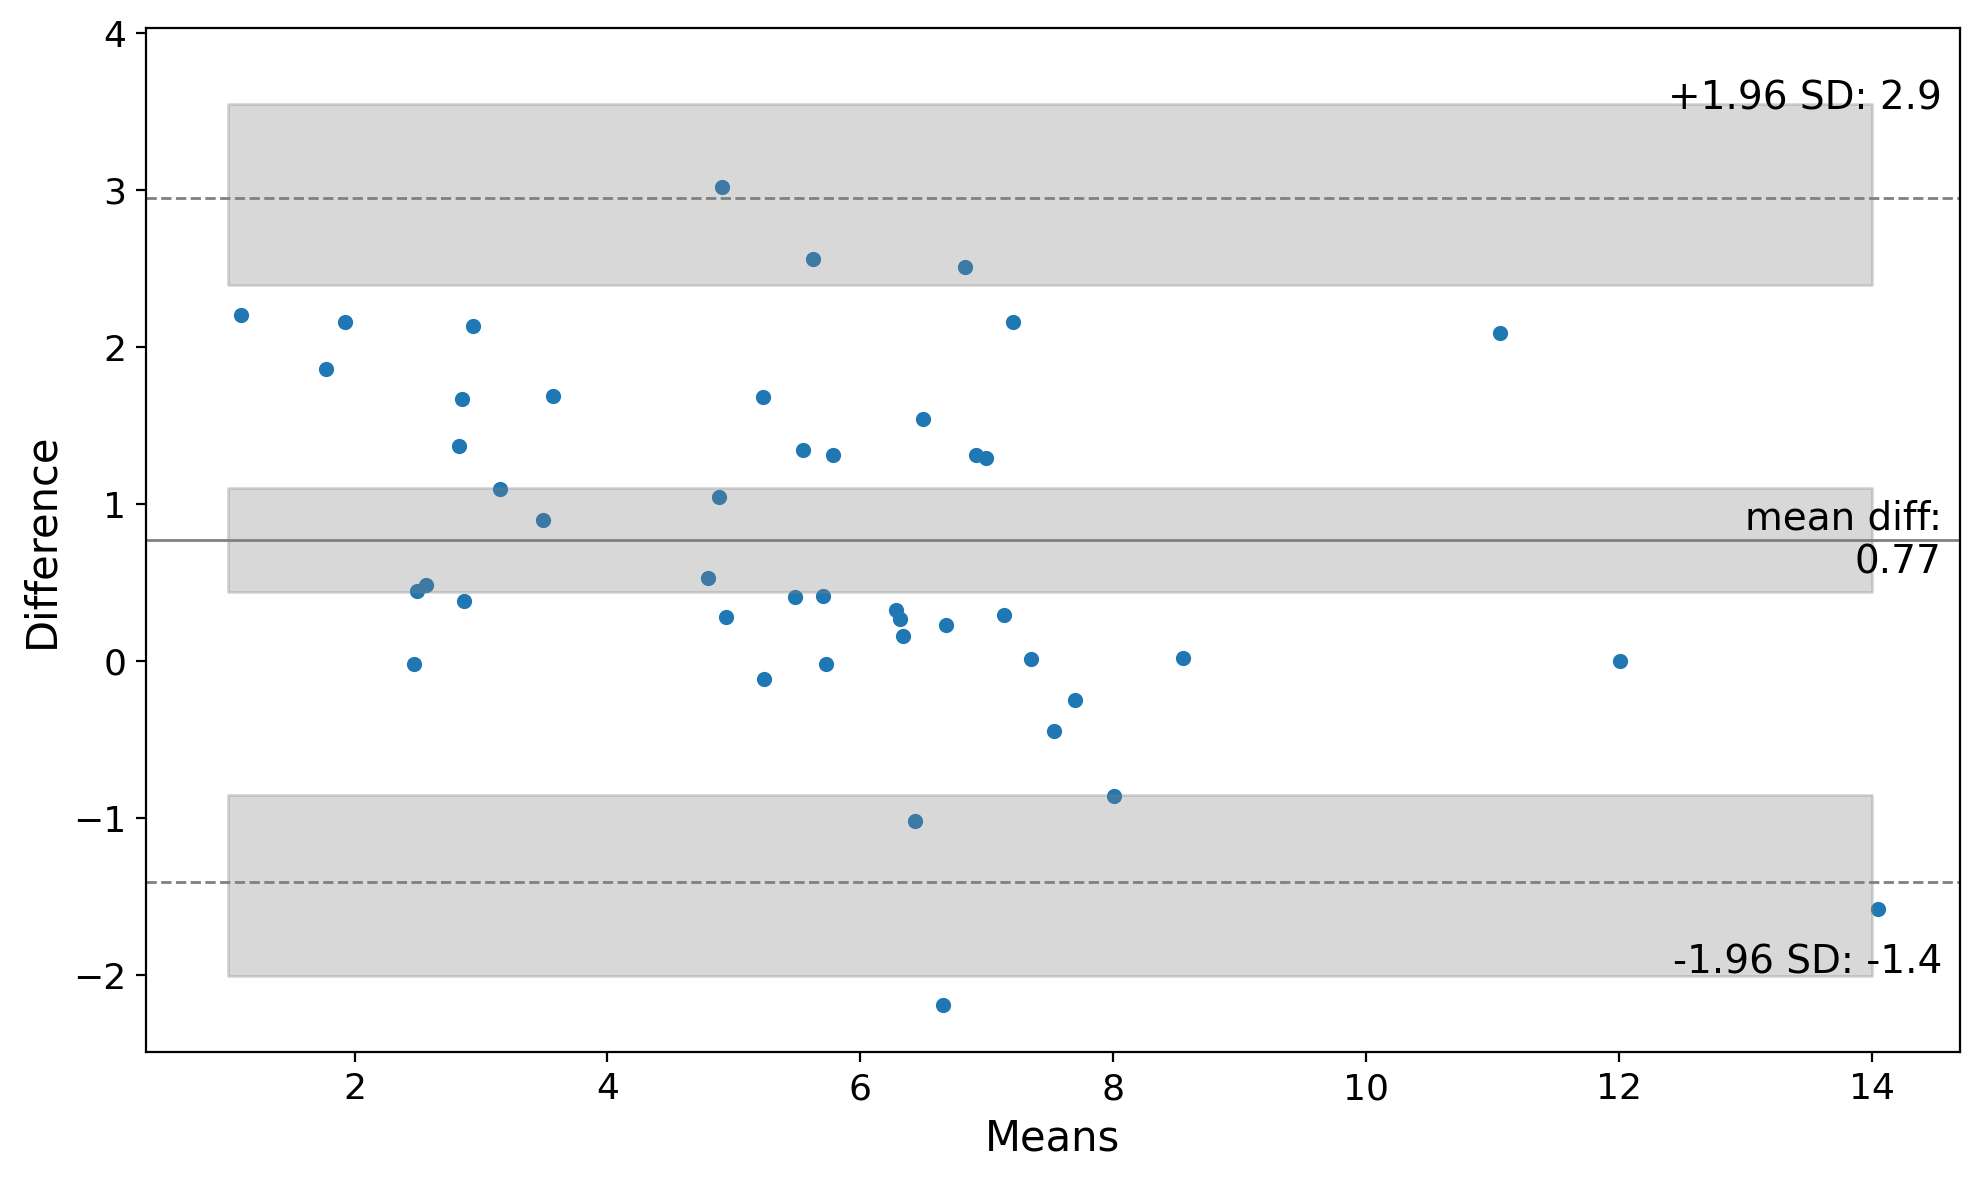

In [35]:
fig, ax = plt.subplots(1)
sm.graphics.mean_diff_plot(result["sqrt_Vector"],result["sqrt_xMAP"], ax = ax)
x = list(range(1,15))
upper = result["delta_sqrt"].mean() + result["delta_sqrt"].std() * 1.96
lower = result["delta_sqrt"].mean() - result["delta_sqrt"].std() * 1.96
ax.fill_between(x, np.repeat(result["delta_sqrt"].mean() - t*se_mean,len(x)), np.repeat(result["delta_sqrt"].mean() + t*se_mean,len(x)), color = "grey", alpha = 0.3)
ax.fill_between(x, np.repeat(upper - t*se_limit,len(x)), np.repeat(upper + t*se_limit,len(x)), color = "grey", alpha = 0.3)
ax.fill_between(x, np.repeat(lower - t*se_limit,len(x)), np.repeat(lower + t*se_limit,len(x)), color = "grey", alpha = 0.3)
plt.show()

Passing-Bablok

In [1]:
import rpy2
%load_ext rpy2.ipython

In [9]:
%%R
#install.packages("mcr")
install.packages("cellranger")
install.packages("readxl")

R[write to console]: Устанавливаю пакет в ‘/home/stotoshka/R/x86_64-pc-linux-gnu-library/4.2’
(потому что ‘lib’ не определено)

R[write to console]: пробую URL 'https://cloud.r-project.org/src/contrib/cellranger_1.1.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 63857 bytes (62 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG -Iunix -I. -I'/usr/local/lib/R/site-library/cpp11/include' -I'/home/stotoshka/R/x86_64-pc-linux-gnu-library/4.2/progress/include'   -fvisibility=hidden -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-apO4Ea/r-base-4.2.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c cpp11.cpp -o cpp11.o
g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG -Iunix -I. -I'/usr/local/lib/R/site-library/cpp11/include' -I'/home/stotoshka/R/x86_64-pc-linux-gnu-library/4.2/progress/include'   -fvisibility=hidden -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-apO4Ea/r-base-4.2.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c XlsWorkBook.cpp -o XlsWorkBook.o
g++ -std=gnu++11 -I"/usr/share/R/include" -DNDEBUG -Iunix -I. -I'/usr/local/lib/R/site-library/cpp11/include' -I'/home/stotoshka/R/x86_64-pc-linux-gnu-library/4.2/progress/include'   -fvisibility=hidden -fpic  -g -

installing to /home/stotoshka/R/x86_64-pc-linux-gnu-library/4.2/00LOCK-readxl/00new/readxl/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (readxl)
R[write to console]: 

R[write to console]: 
R[write to console]: Скачанные исходники пакетов находятся в
	‘/tmp/RtmpxSVsfq/downloaded_packages’
R[write to console]: 
R[write to console]: 



In [22]:
%%R
library(mcr)
data = as.data.frame(readxl::read_excel("results_xmap_and_vector.xlsx"))
head(data)

   ID Holes Outcome Age Sex Try_1, pg/ml Try_2, pg/ml Mean, pg/ml xMAP, pg/ml
1   7 G2,H2  смерть  59   1        30.68        31.13       30.91   60.042296
2  55 G7,H7 тяжелый  62   1        26.29        24.84       25.57   20.481909
3  70 H1,B3  смерть  50   1        51.69        54.35       53.02   48.805099
4 110 E2,F2  смерть  57   1        17.86        21.03       19.45    7.412301
5 129 C3,D3  смерть  62   1       133.30       155.10      144.20  144.136971
6 165 E5,F5  смерть  69   2        60.07        48.20       54.14   53.901382


In [24]:
%%R
colnames(data)
typeof(data["Mean, pg/ml"])

[1] "list"


In [25]:
%%R
PB.reg <- mcreg(as.numeric(data[,"Mean, pg/ml"]),as.numeric(data[,"xMAP, pg/ml"]), method.reg = "PaBa")
PB.reg@para

                EST SE         LCI       UCI
Intercept -6.980365 NA -11.1151120 -2.185555
Slope      1.063538 NA   0.8319217  1.208702


In [30]:
%%R
PB.reg

An object of class "MCResultResampling"
Slot "glob.coef":
[1] -6.980365  1.063538

Slot "glob.sigma":
[1] NA NA

Slot "xmean":
[1] NA

Slot "nsamples":
[1] 999

Slot "nnested":
[1] 25

Slot "B0":
  [1]  -5.027312175  -8.023224364  -4.697028992  -8.940768762  -8.770049503
  [6]  -6.239531637  -5.955839286  -6.998084512  -5.070052769  -4.445164155
 [11]  -5.572786148  -7.679838427  -4.893568967  -7.706893564  -5.831835636
 [16]  -9.043527045  -5.598910422  -9.682171085  -6.791436532  -7.878655092
 [21]  -9.304255682  -8.094767445  -7.756295247  -8.302703101  -6.952834650
 [26]  -5.057355870  -6.776677408  -5.058880881  -8.122989841  -7.531258558
 [31]  -8.360161855  -7.030365723  -7.039085401  -4.548473348  -5.887277897
 [36]  -6.062378126  -6.793569907  -7.736372879  -8.904490349  -5.572186127
 [41]  -6.288337864  -7.728995444  -7.565875389  -5.275475522  -5.030536210
 [46]  -8.358644015  -3.521191689  -6.005895590  -7.010389505  -7.789721463
 [51]  -6.267943654  -5.987147977  -6.776794

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  1   1   1   1   1   1   1   1   1   1   1   1   1   1 
S41 S42 S43 S44 S45 
  1   1   1   1   1 



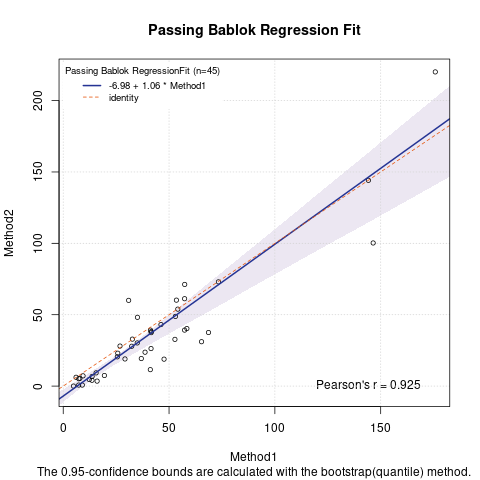

In [26]:
%%R
plot(PB.reg)

In [31]:
%%R
printSummary(PB.reg)



------------------------------------------

Reference method: Method1
Test method:     Method2
Number of data points: 45

------------------------------------------

The confidence intervals are calculated with
 bootstrap  ( quantile ) method.
Confidence level: 95%


------------------------------------------

PASSING BABLOK REGRESSION FIT:

                EST SE         LCI       UCI
Intercept -6.980365 NA -11.1151120 -2.185555
Slope      1.063538 NA   0.8319217  1.208702


------------------------------------------

BOOTSTRAP SUMMARY

          global.est bootstrap.mean     bias bootstrap.se
Intercept   -6.98036       -7.03404 -0.05367      2.13732
Slope        1.06354        1.05375 -0.00978      0.09147

Bootstrap results generated with environment RNG settings.
NULL


In [16]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [17]:
%%R
sample(1:10)

 [1]  8 10  4  5  6  9  2  7  1  3


In [20]:
sp.stats.t(df = 29).ppf(0.975)

-2.0452296421327034

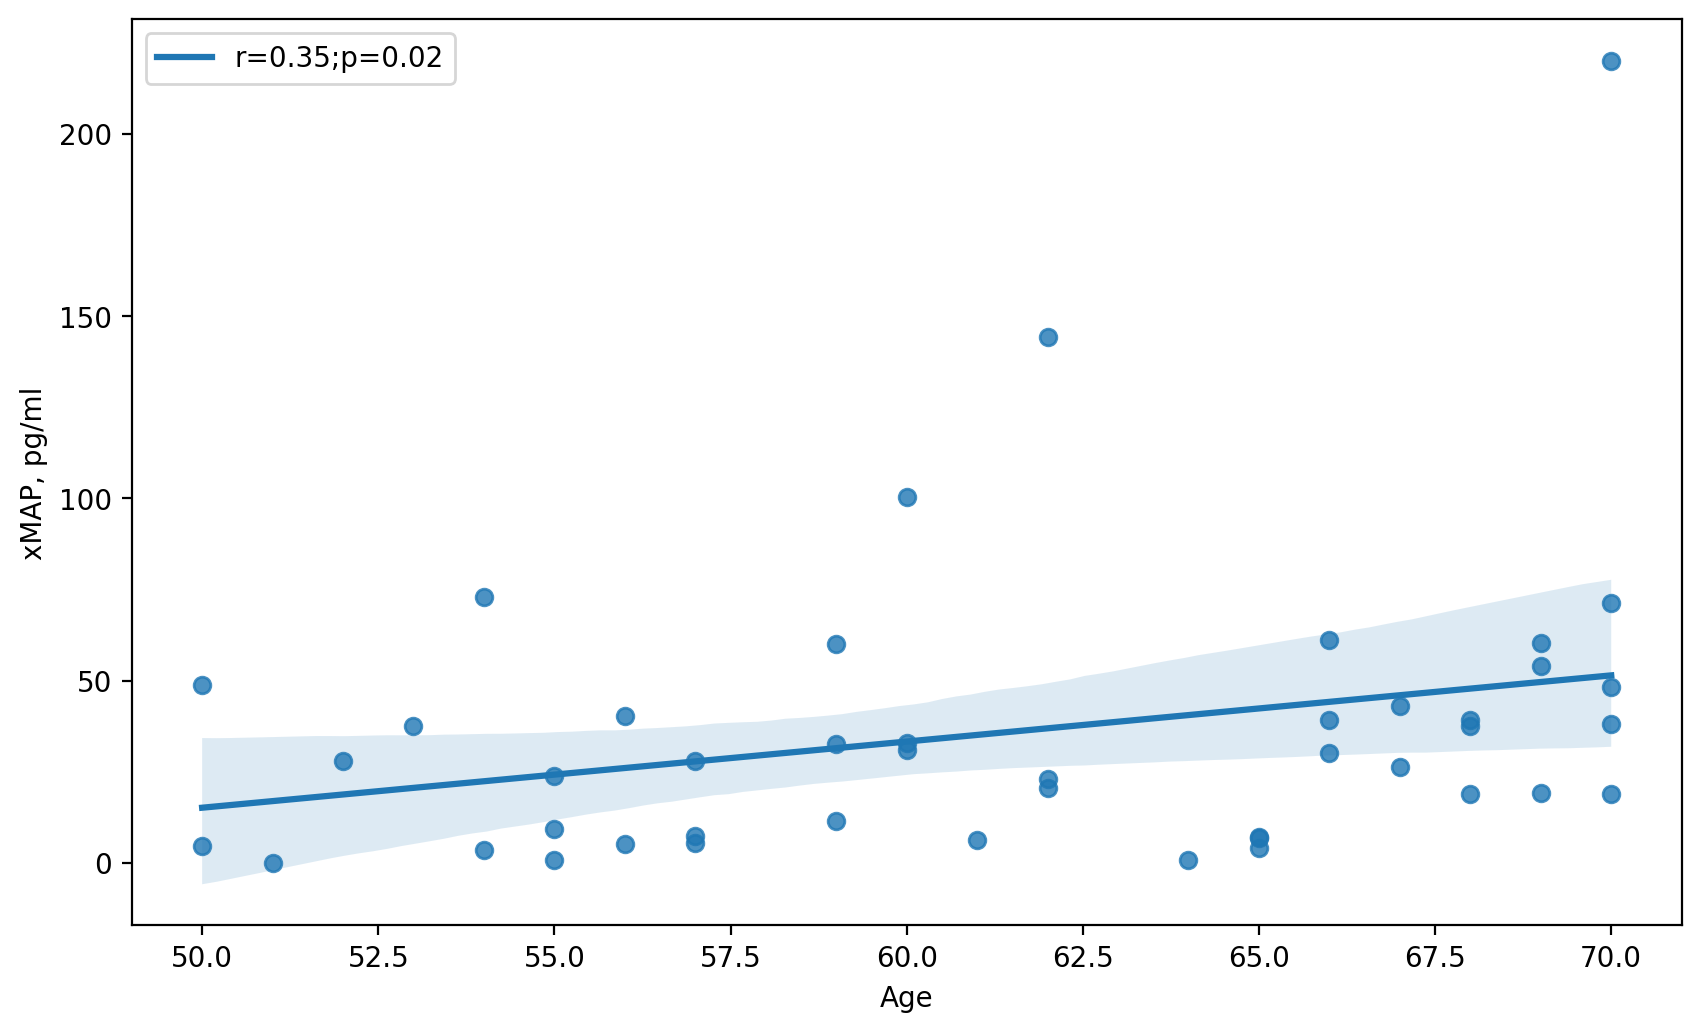

In [47]:
r, p = sp.stats.spearmanr(a = result["Age"], b = result["xMAP, pg/ml"])
ax = sns.regplot(data = result, x = "Age", y = "xMAP, pg/ml", line_kws={'label':"r={:.2f};p={:.2f}".format(r,p)})
ax.legend()


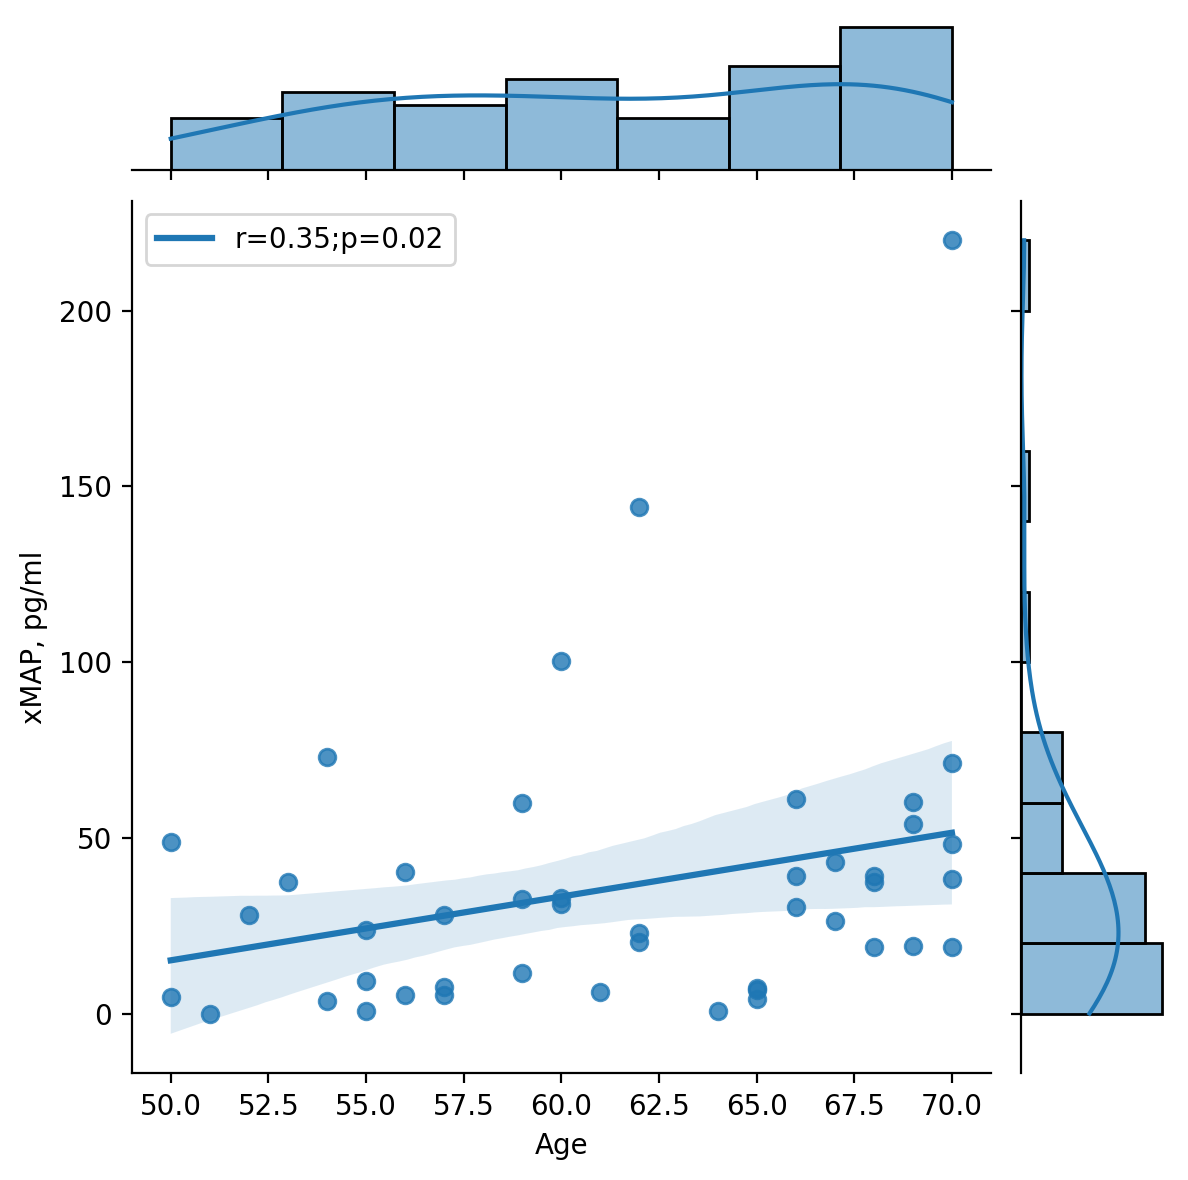

In [50]:
r, p = sp.stats.spearmanr(a = result["Age"], b = result["xMAP, pg/ml"])
ax = sns.jointplot(data = result, x = "Age", y = "xMAP, pg/ml", kind="reg", line_kws={'label':"r={:.2f};p={:.2f}".format(r,p)})
ax.ax_joint.legend()

((array([-2.16261902, -1.78552545, -1.56210618, -1.397212  , -1.26342445,
         -1.1490787 , -1.04806126, -0.95674251, -0.87277802, -0.79455752,
         -0.72092154, -0.65100286, -0.58413203, -0.51977796, -0.45750906,
         -0.39696667, -0.33784646, -0.27988499, -0.22284956, -0.16653055,
         -0.11073524, -0.05528282,  0.        ,  0.05528282,  0.11073524,
          0.16653055,  0.22284956,  0.27988499,  0.33784646,  0.39696667,
          0.45750906,  0.51977796,  0.58413203,  0.65100286,  0.72092154,
          0.79455752,  0.87277802,  0.95674251,  1.04806126,  1.1490787 ,
          1.26342445,  1.397212  ,  1.56210618,  1.78552545,  2.16261902]),
  array([  4.86,   6.06,   7.31,   7.36,   7.88,   9.02,   9.36,  12.31,
          13.6 ,  13.65,  15.53,  16.01,  19.45,  25.57,  25.78,  26.83,
          29.18,  30.91,  32.36,  32.68,  34.98,  35.07,  36.89,  38.66,
          41.15,  41.21,  41.49,  41.56,  41.56,  46.18,  47.64,  52.78,
          53.02,  53.48,  54.14,  57.34,

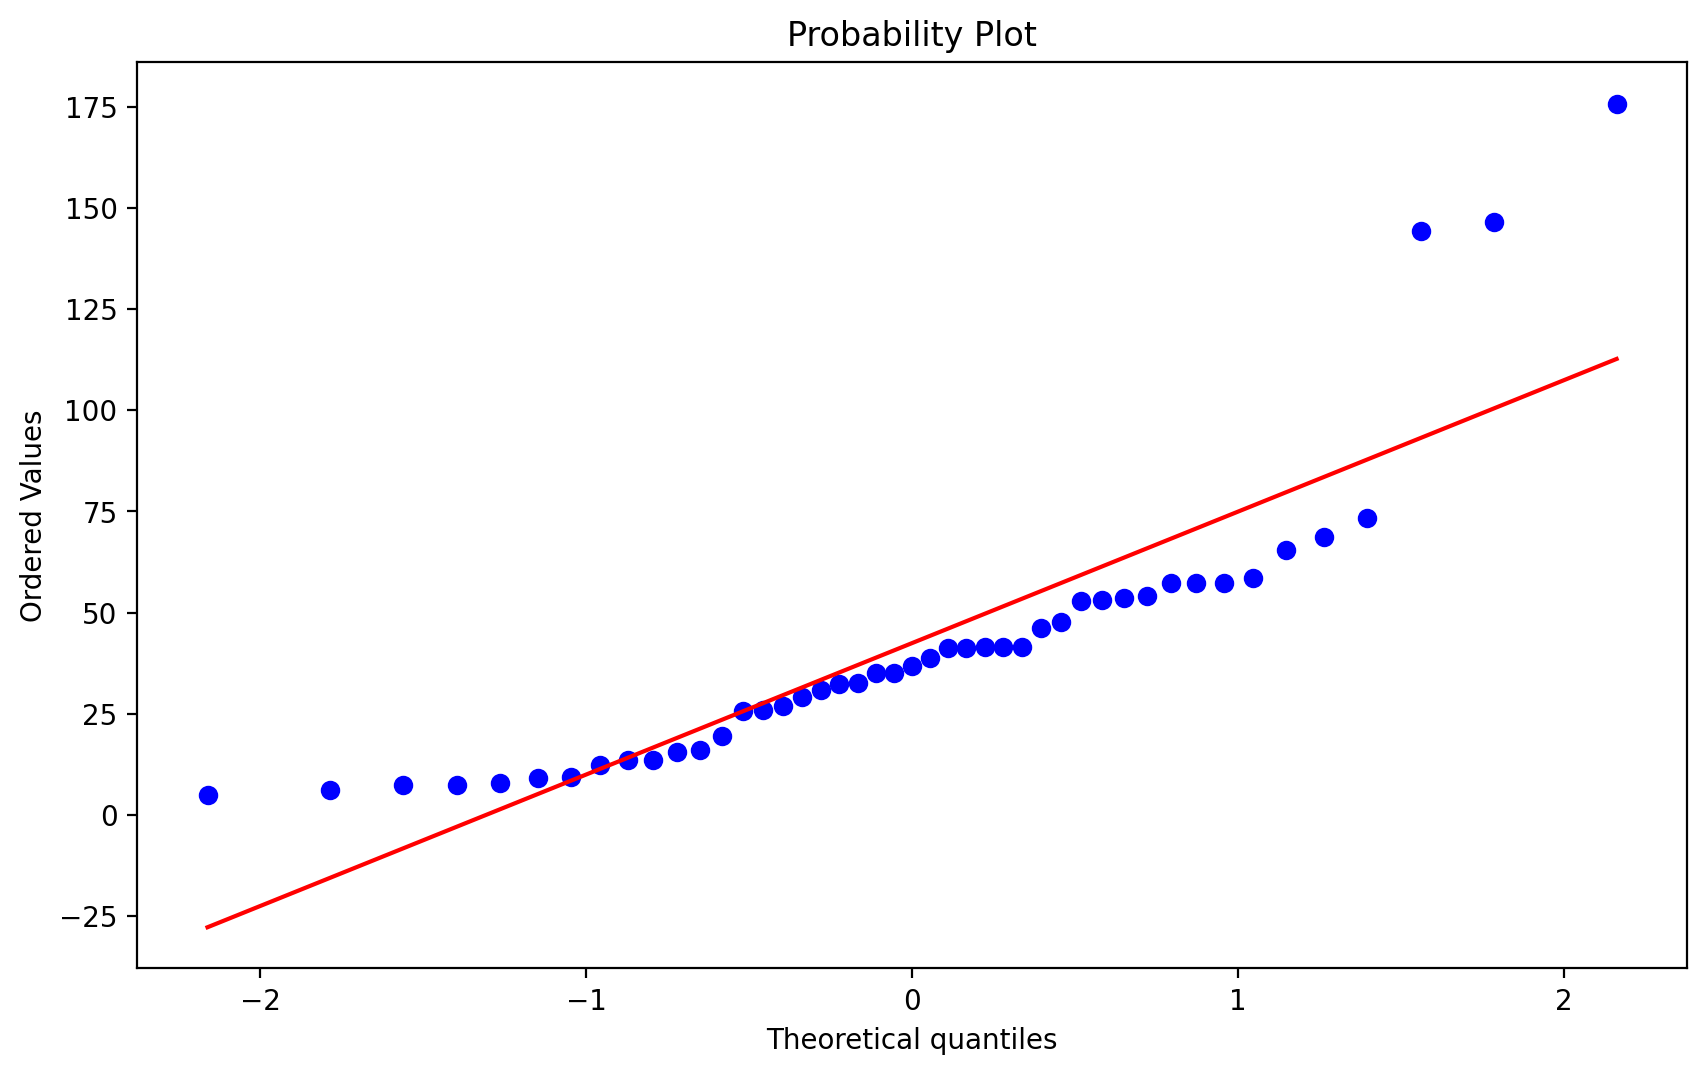

In [38]:
sp.stats.probplot(result["Mean, pg/ml"],plot = plt)

((array([-2.16261902, -1.78552545, -1.56210618, -1.397212  , -1.26342445,
         -1.1490787 , -1.04806126, -0.95674251, -0.87277802, -0.79455752,
         -0.72092154, -0.65100286, -0.58413203, -0.51977796, -0.45750906,
         -0.39696667, -0.33784646, -0.27988499, -0.22284956, -0.16653055,
         -0.11073524, -0.05528282,  0.        ,  0.05528282,  0.11073524,
          0.16653055,  0.22284956,  0.27988499,  0.33784646,  0.39696667,
          0.45750906,  0.51977796,  0.58413203,  0.65100286,  0.72092154,
          0.79455752,  0.87277802,  0.95674251,  1.04806126,  1.1490787 ,
          1.26342445,  1.397212  ,  1.56210618,  1.78552545,  2.16261902]),
  array([  0.        ,   0.7103639 ,   0.7103639 ,   3.47808962,
           4.06903957,   4.56660957,   5.14097907,   5.392837  ,
           6.1630144 ,   6.76660593,   7.1674188 ,   7.41230054,
           9.25      ,  11.51393427,  18.85951219,  18.99999991,
          19.29484028,  20.48190913,  23.0293849 ,  23.72923663,
       

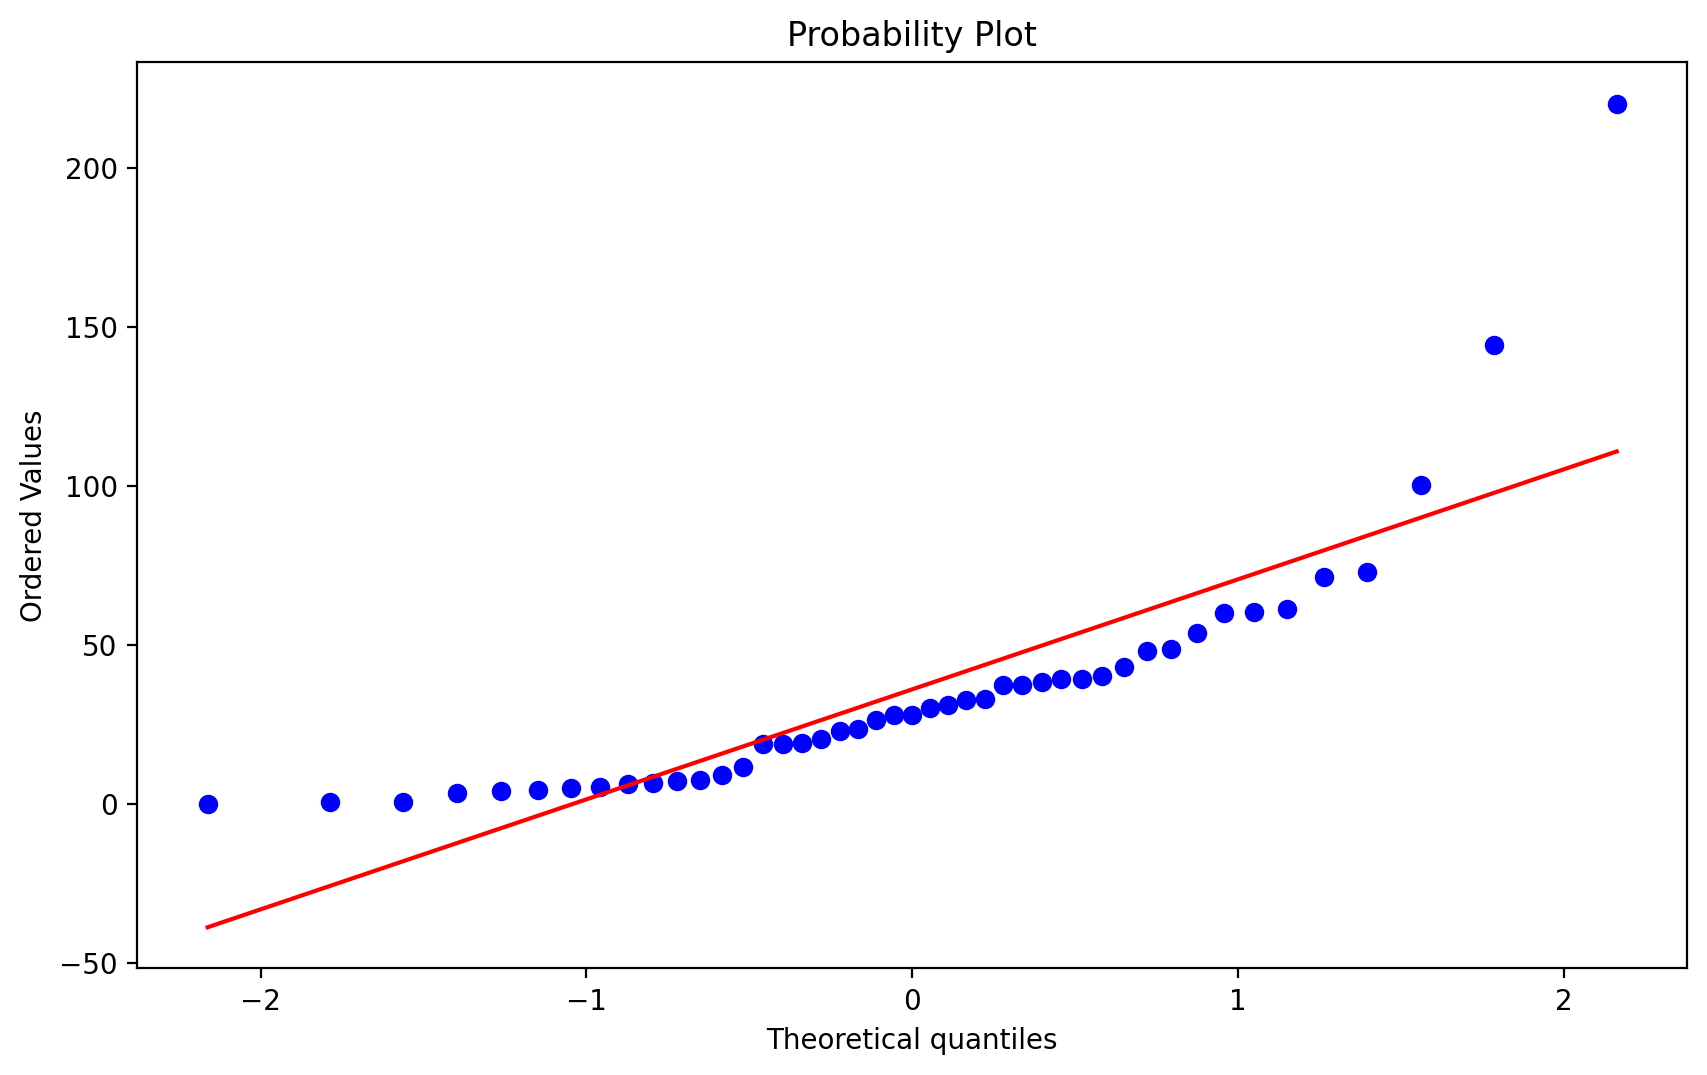

In [39]:
sp.stats.probplot(result["xMAP, pg/ml"],plot = plt)

Сравнение групп

In [54]:
result.head()

,ID,Holes,Outcome,Age,Sex,"Try_1, pg/ml","Try_2, pg/ml","Mean, pg/ml","xMAP, pg/ml"
0,7,"G2,H2",смерть,59,1,30.68,31.13,30.91,60.042296
1,55,"G7,H7",тяжелый,62,1,26.29,24.84,25.57,20.481909
2,70,"H1,B3",смерть,50,1,51.69,54.35,53.02,48.805099
3,110,"E2,F2",смерть,57,1,17.86,21.03,19.45,7.412301
4,129,"C3,D3",смерть,62,1,133.30,155.10,144.20,144.136971


In [55]:
print(result.shape)

(45, 9)


In [56]:
disease = result[result["Outcome"] != "здоровый"]
print(disease.shape)

(37, 9)


In [58]:
print(disease["Outcome"].value_counts())

смерть     17
средний    14
тяжелый     6
Name: Outcome, dtype: int64


In [59]:
dead = disease.loc[disease["Outcome"] == "смерть", "xMAP, pg/ml"]
moderate = disease.loc[disease["Outcome"] == "средний", "xMAP, pg/ml"]
severe = disease.loc[disease["Outcome"] == "тяжелый", "xMAP, pg/ml"]

In [60]:
H, p = sp.stats.kruskal(dead,moderate,severe)
print(H , p)

0.36038825202913927 0.8351080794715648


In [61]:
sp.stats.mannwhitneyu(dead,moderate)

MannwhitneyuResult(statistic=128.0, pvalue=0.735814797438752)

In [62]:
sp.stats.mannwhitneyu(severe,moderate)

MannwhitneyuResult(statistic=47.0, pvalue=0.7180598555211559)

In [63]:
sp.stats.mannwhitneyu(severe,dead)

MannwhitneyuResult(statistic=59.0, pvalue=0.608794714057872)